<a href="https://colab.research.google.com/github/Klakson473/lab3/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
from google.colab import files

uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [115]:
import os

for dirpath, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

/content/StudentsPerformance.csv
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/gce
/content/.config/active_config
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2024.01.09/14.23.05.476854.log
/content/.config/logs/2024.01.09/14.23.14.633239.log
/content/.config/logs/2024.01.09/14.22.23.587009.log
/content/.config/logs/2024.01.09/14.23.15.497653.log
/content/.config/logs/2024.01.09/14.22.48.827583.log
/content/.config/logs/2024.01.09/14.22.57.783281.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


In [ ]:
!ls

sample_data  StudentsPerformance.csv


In [ ]:
uploaded_str=uploaded['StudentsPerformance.csv'].decode()
print(type(uploaded_str))

<class 'str'>


In [ ]:
print(uploaded_str[:35])

"gender","race/ethnicity","parental


In [116]:
file = open('/content/StudentsPerformance.csv','r')
for i, line in enumerate(file):
  print(line.strip())
  if i == 3:
    break

file.close()

"gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"
"female","group B","bachelor's degree","standard","none","72","72","74"
"female","group C","some college","standard","completed","69","90","88"
"female","group B","master's degree","standard","none","90","95","93"


In [117]:
import pandas as pd

file = pd.read_csv('/content/StudentsPerformance.csv')
file.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: xlabel='gender', ylabel='count'>

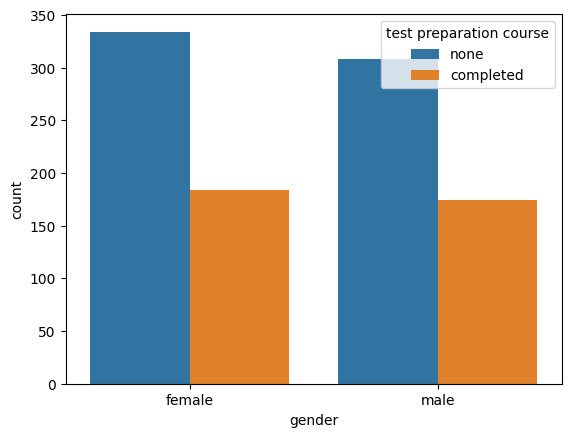

In [ ]:
import seaborn as sns
# Возьмем две категории с типом object
sns.countplot(x='gender',hue='test preparation course',data = file)

<Axes: xlabel='race/ethnicity', ylabel='count'>

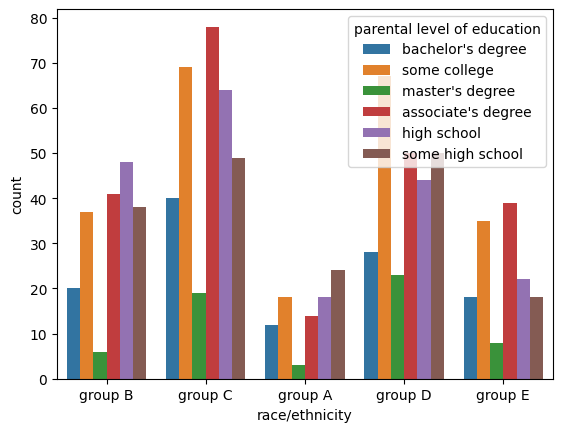

In [ ]:
sns.countplot(x='race/ethnicity',hue='parental level of education',data = file)

In [ ]:
file.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [118]:
#Добавим столбец с id
file.insert(0,'StudentID',file.index + 1)

# Удалим так же ненужные столбцы через drop_first
StudentID = file[['StudentID']]
gender  = pd.get_dummies(file[['gender']], drop_first=True)
race_ethnicity  = pd.get_dummies(file[['race/ethnicity']])
parental_level_of_education = pd.get_dummies(file[['parental level of education']])
lunch = pd.get_dummies(file[['lunch']], drop_first=True)
test_preparation_course = pd.get_dummies(file[['test preparation course']],drop_first=True)
math_score = file[['math score']]
reading_score = file[['reading score']]
writing_score = file[['writing score']]
# Удалим старые столбцы
file.drop(['StudentID','gender','race/ethnicity','parental level of education','lunch','test preparation course',
           'math score','reading score','writing score'], axis = 1, inplace = True)

In [119]:
file = pd.concat([file,StudentID,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,
                  math_score,reading_score,writing_score],axis=1)

file.head(3)

,StudentID,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,72,72,74
1,2,0,0,0,1,0,0,0,0,0,0,1,0,1,0,69,90,88
2,3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,90,95,93


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

file[['math score','reading score','writing score']] = \
scaler.fit_transform(file[['math score','reading score','writing score']])

print(file[['math score','reading score','writing score']])

     math score  reading score  writing score
0      0.390024       0.193999       0.391492
1      0.192076       1.427476       1.313269
2      1.577711       1.770109       1.642475
3     -1.259543      -0.833899      -1.583744
4      0.653954       0.605158       0.457333
..          ...            ...            ...
995    1.445746       2.044215       1.774157
996   -0.269803      -0.970952      -0.859491
997   -0.467751       0.125472      -0.201079
998    0.126093       0.605158       0.589015
999    0.719937       1.153370       1.181586

[1000 rows x 3 columns]


In [121]:
from sklearn.model_selection import train_test_split
# Столбец test preparation course_none станет целевой переменной
x_train, x_test, y_train, y_test = train_test_split(file.drop(columns=['test preparation course_none']),
file['test preparation course_none'],train_size = 0.7)

In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1010)

model.fit(x_train,y_train)

P_file = model.predict(x_train)  # Файл предсказания класса

In [124]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train,P_file)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,133,116
1,63,388


In [125]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_train,P_file)

round(model_accuracy, 3)

0.744

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1010)

model.fit(x_test,y_test)

P_file = model.predict(x_test)  # Файл предсказания класса

In [127]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,P_file)

conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,58,51
1,29,162


In [128]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(y_test,P_file)

round(model_accuracy, 3)

0.733

In [129]:
P_file[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=uint8)

In [130]:
ids = x_test['StudentID']

result_file = pd.DataFrame({'StudentID':ids,'test preparation course_none':P_file})

result_file.head()


,StudentID,test preparation course_none
204,205,1
248,249,1
758,759,1
189,190,1
80,81,1


In [131]:
result_file.to_csv('result.csv', index = False)

print('Файл сохранен!')

Файл сохранен!
